# Projet SES722 2018-2019 
*BEC Alexandre, FABIEN Maël*

# Partie I - Regression

## Question 1

- <font color="blue">Lire le fichier **mroz.txt**. </font>

https://www.rdocumentation.org/packages/car/versions/2.1-6/topics/Mroz

- <font color="blue">Ne sélectionner que les observations pour lesquelles la variable **wage** est strictement positive.</font>

In [129]:
df_filt.head()

On dispose de  428  observations.


,inlf,hours,kidslt6,kidsgt6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


## Question 2

- <font color="blue">Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour : </font>

### L’ensemble des femmes

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


Le salaire moyen des femmes dans la base de données est de 4.17. L'âge moyen est 42 ans. Le nombre d'années d'éducation moyen est de 12.7 années.

### Pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon.

,wage,age,educ
count,214.000000,214.000000,214.000000
mean,4.896822,42.275701,13.242991
std,4.041606,7.388843,2.359045
min,0.161600,30.000000,5.000000
25%,2.513850,36.000000,12.000000
50%,3.846400,43.000000,12.000000
75%,5.854125,48.000000,16.000000
max,25.000000,59.000000,17.000000


Le salaire moyen des femmes dont mari gagne plus que la médiane est de 4.90. L'âge moyen est de 42.3 ans, et le nombre d'années d'éducation moyen est de 13.2 années.

### Pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon.

,wage,age,educ
count,214.000000,214.000000,214.000000
mean,3.458541,41.668224,12.074766
std,2.143274,8.045482,2.054200
min,0.128200,30.000000,6.000000
25%,2.117275,35.000000,12.000000
50%,2.971800,41.000000,12.000000
75%,4.393800,47.000000,12.000000
max,18.267000,60.000000,17.000000


Le salaire moyen des femmes dont la mari gagne moins que la médiane est de 3.46. On voit que les femmes dont le mari gagne plus que la médiane gagnent en moyenne plus que les femmes dont le mari gagne moins que la médiane. Par ailleurs, l'écart-type est plus élevé pour les femmes dont le mari gagne plus que la médiane.

L'âge moyen pour le groupe des femmes dont le mari gagne moins que la médiane est de 41.7 ans, et le nombre d'années d'éducation moyen est 12.1 années.

On peut supposer l'existence de deux sous-groupes :
- les femmes ayant bénéficié de moins d'éducation et disposant d'un salaire inférieur
- les femmes plus jeunes, et dont le mari est probablement plus jeune, qui gagnent moins que la médiane.

### Graphes de distribution

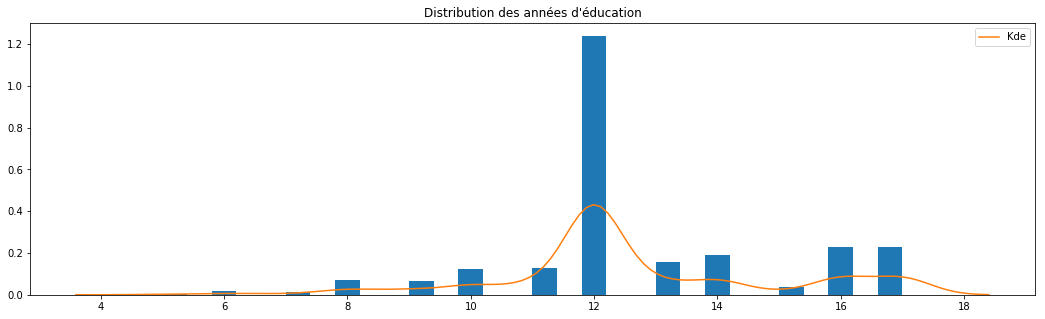

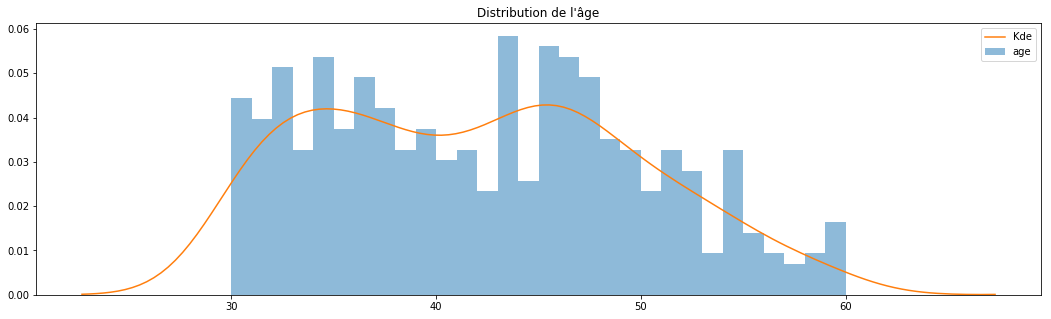

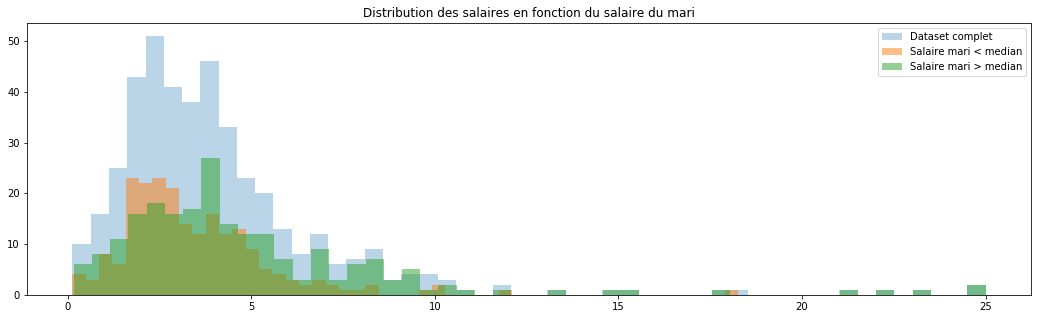

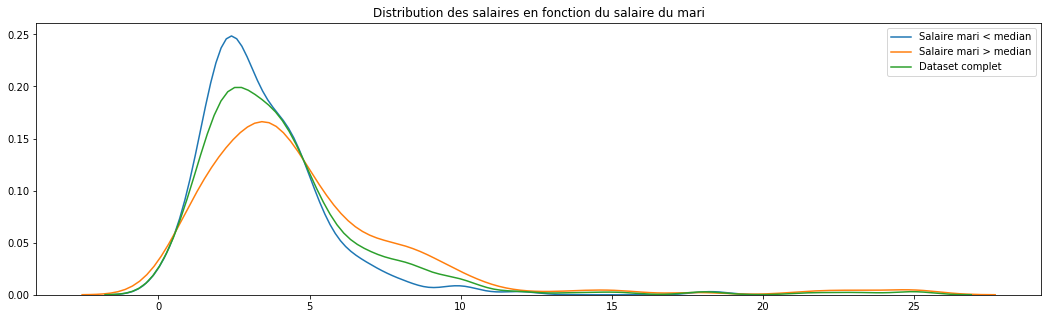

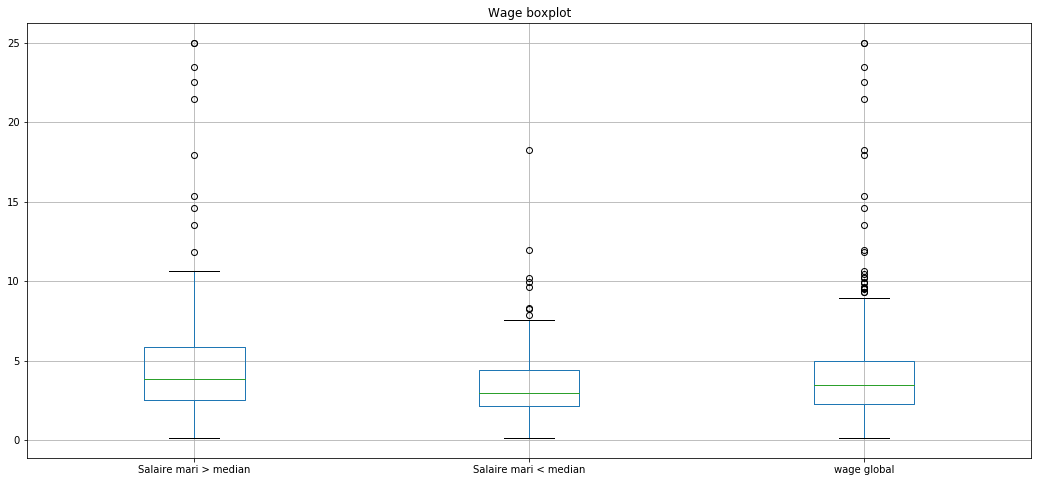

Par ces distributions, on illustre que lorsque le salaire du mari est supérieur à la médiane, le salaire de la femme semble être généralement plus élevé. Ceci devrait s'illustrer par une corrélation positive entre ces deux valeurs. La variance est également plus importante parmi les salaires des femmes dont le mari gagne plus que la médiane sur le box-plot.

## Question 3
- <font color="blue">Faire l'histogramme de la variable wage.</font>

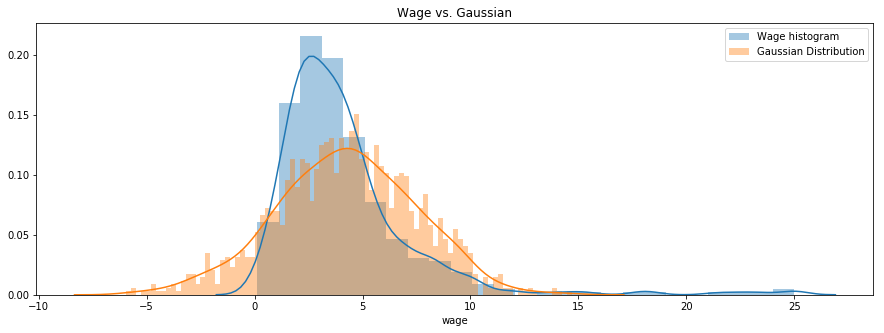

- <font color="blue">Calculer le log de wage et faire l'histogramme.</font>

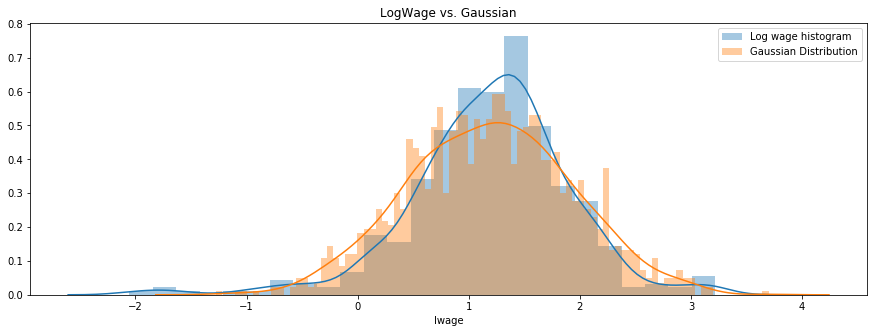

- <font color="blue">Comparez les deux histogrammes et commentez</font>

En prenant la variable **lwage**, la distribution semble plus proche d'un gaussienne. L'histogramme de **wage** est asymétrique car non négatif. C'est confirmé par le score de skewness avec **stats.skew**, qui est fortement positif pour la feature **wage**.

In [142]:
print(stats.skew(df_filt.wage))
print(stats.skew(df_filt.lwage))

3.0801391789818724
-0.6851599225277718


On peut supposer que travailler avec la variable lwage permettra de résoudre certains problèmes posés par wage.

## Question 4
- <font color="blue">Calculer les corrélations motheduc et fatheduc.</font>

Corrélation motheduc vs fatheduc:  0.554
p-value pour H0 pas de corrélation :  0.0


- <font color="blue">Commentez.</font>

La corrélation est de 55% entre l'éducation de la mère et celle du père. Cela s'explique probablement par le fait que les deux personnes au sein d'un couple appartiennent souvent à la même classe sociale et bénéficient des mêmes possibilités d'accès à l'éducation.

- <font color="blue">Il y a-t-il un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives ?</font>

On rejette l'hypothèse nulle (pas de correlation) au seuil de 5%. La corrélaiton entre les deux variables peut introduire un biais de multicollinéarité. 

Inclure ces deux variables peut surpondérer l'information sur l'éducation des parents. Cependant, une corrélation de 0.55 n'est pas une corrélation parfaite, et peut porter de l'information.

On peut d'ailleurs illustrer la corrélation entre les deux séries de cette manière. On remarque

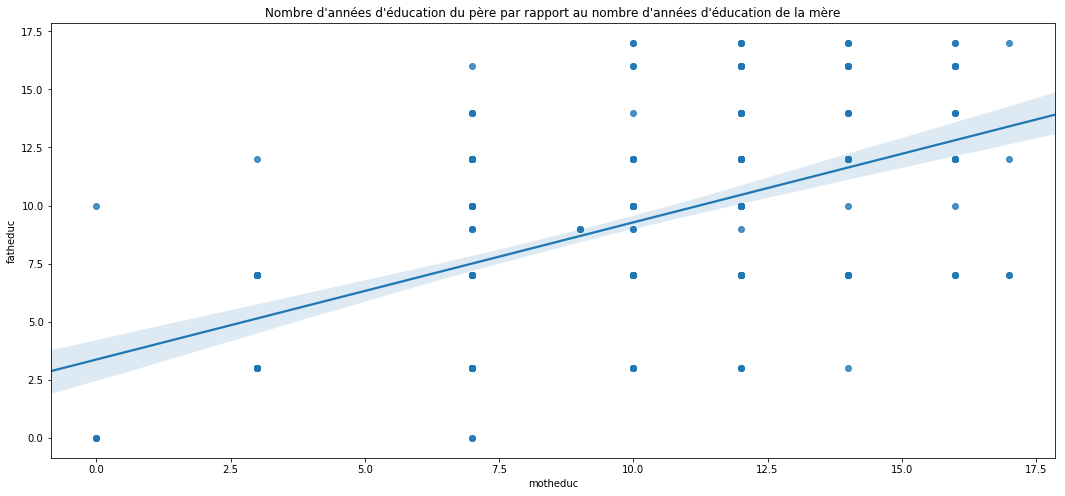

Il semble cependant y avoir un léger effet de compensation entre le nombre d'années d'éducation des parents. En effet, lorsque l'on affiche la différence entre le nombre d'années d'étude des deux parents, en fonction du nombre d'années d'étude de la mère, on se rend compte que :
- lorsque la mère réalise très peu d'études, le père réalise généralement plus d'études
- lorsque la mère réalise beaucoup d'études, le père réalise en moyenne légèrement moins d'études

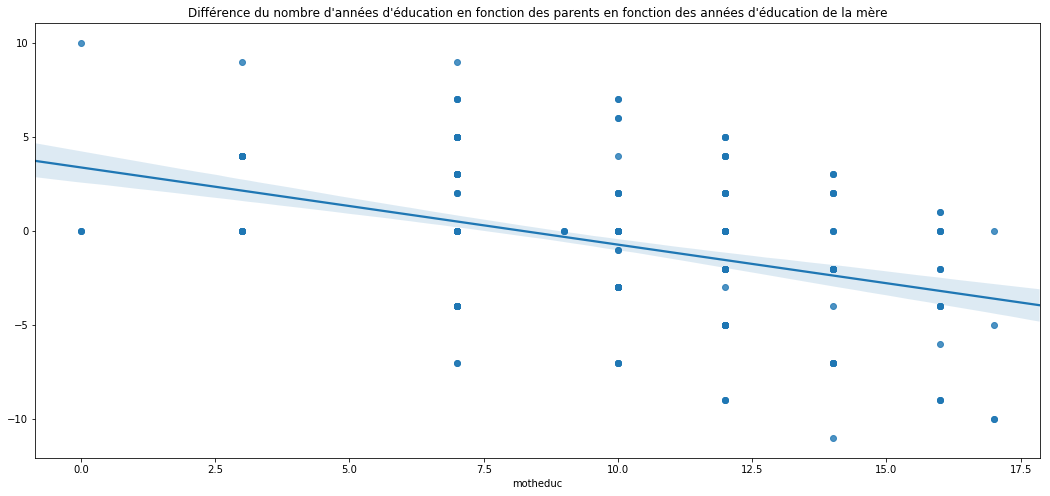

## Question 5
- <font color="blue">Faites un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc. Commentez.  S'agit-il d'un effet "toute chose étant égale par ailleurs ?"</font>

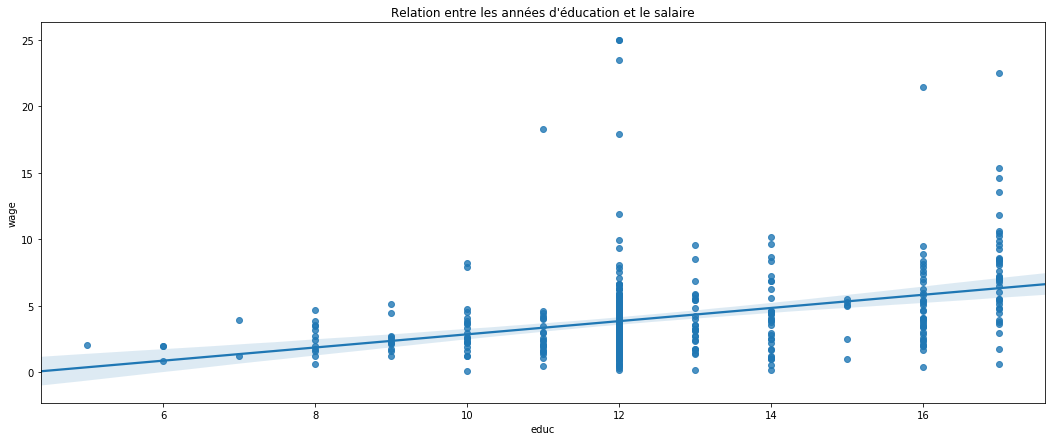

- Il ne s'agit pas d'un effet "toute chose étant égale par ailleurs", car pour chaque donnée, le reste des variables ne sont pas constantes. 
- D'après la regression linéaire, les années d'éducation supplémentaires semblent augmenter significativement le salaire. Nous contrôlerons ceci juste après.
- Il semble que la variance ne soit pas la même pour chacune des années d'éducation (12 et 17 avec des pics de variance). Cela peut impliquer des problèmes d'héteroscedasticité.

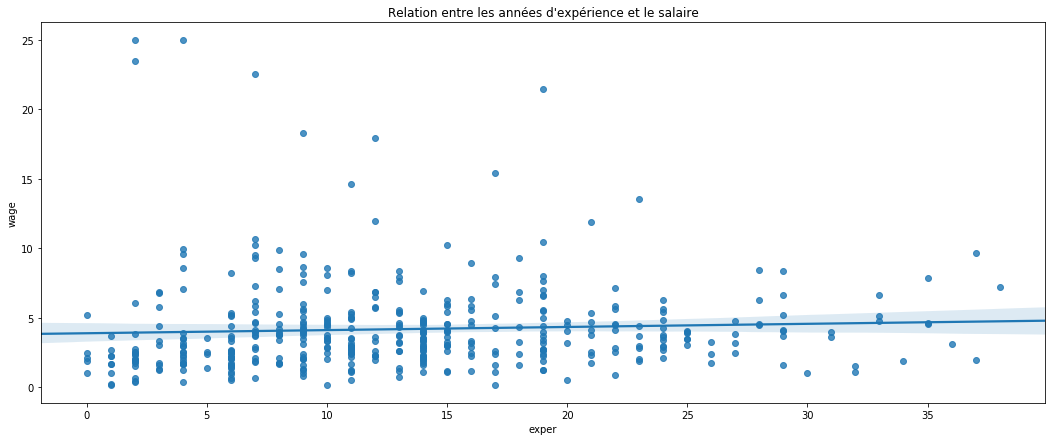

- Certaines observations abérantes biaisent la pente.
- L'effet semble moins significatifs que l'éducation sur le salaire.
- Il existe un biais par rapport au nombre d'années d'éducation en amont. En effet, les jeunes diplomés avec peu d'expérience peuvent atteindre le même salaire d'entrée que des personnes travailllant depuis leur plus jeune âge.

On remarque que des années d'éducation supplémentaires ont tendance à faire augmenter le salaire. Cependant, l'expérience a un effet beaucoup moins prononcé. On remarque notamment quelques points pour lesquels les années d'étude sont relativement élevées et l'expérience très faible, mais pour autant le salaire est particulièrement élevé.

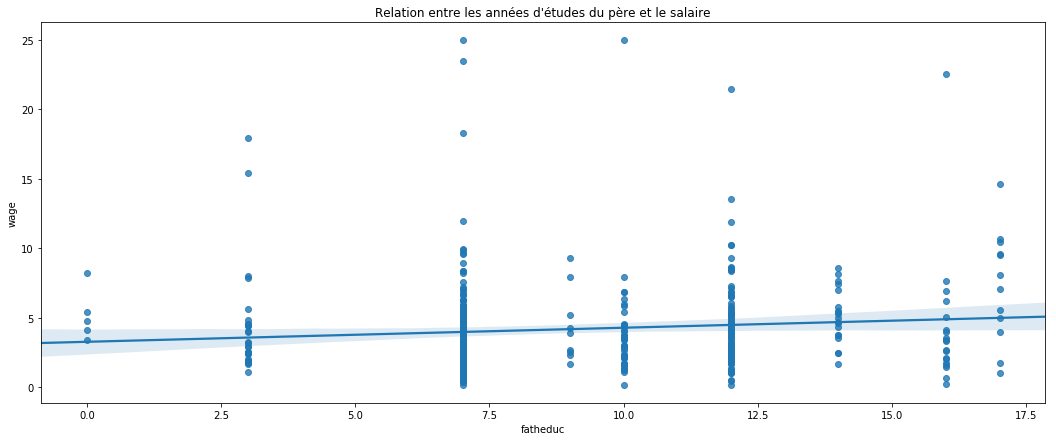

Des années d'éducation supplémentaires du père semblent apporter un meilleur salaire aux enfants. Cependant, la variance ne semble pas uniforme selon le nombre d'années d'études du père.

## Question 6
- <font color="blue">Quelle est l'hypothèse fondamentale qui garantie des estimateurs non biaisés ? </font>

L'hypothèse de normalité des résidus garantit l'obtention du meilleur estimateur linéaire non-biaisé (BLUE). Ainsi, les résidus sont centrés en zéro, de variance constante à travers le temps (iid). On parle alors d'homoscedasticité.

- <font color="blue">Expliquer le biais de variable omise.</font>

On estime un modèle en prenant certaines variables, mais il en existent d'autres, que l'on ne peut pas contrôler par manque de données. Une variable omise viole l'hspothèse de normalité des résidus, car l'effet des variables omises se retrouve en partie dans les résidus. 

## Question 7
- <font color='blue'>Faire la régression de wage en utilisant les variables explicatives une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. </font>

- <font color='blue'>Commentez l'histogramme des résidus.</font>

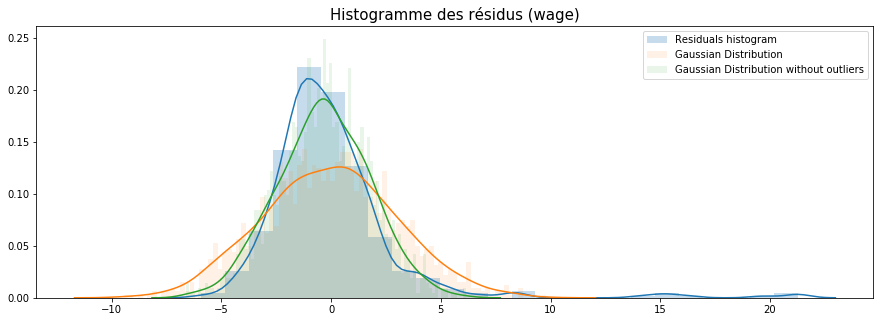

Score Skew & Kurtosis :  345.8247086376311


- Les résidus ne sont pas gaussiens mais centrés en zéro.

- La variance des résidus possède des valeurs extrêmes, qui entâchent l'hypothèse de normalité des résidus. Si on supprime ces valeurs extrêmes des résidus et que l'on trace l'historgramme d'une gaussienne de meme moyenne/variance, les deux courbes sont relativement proches, malgré une légère asymétrie des résidus.

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     10.23
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           1.41e-10
Time:                        17:40:10   Log-Likelihood:                -1090.0
No. Observations:                 428   AIC:                             2194.
Df Residuals:                     421   BIC:                             2222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4035      0.963     -2.495      0.0

- Seule l'éducaton apparait comme variable significative quand on utilise une constante.

## Question 8
- <font color="blue">Faire la régression de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Comparer l’histogramme obtenu à celui de la question 7. </font>

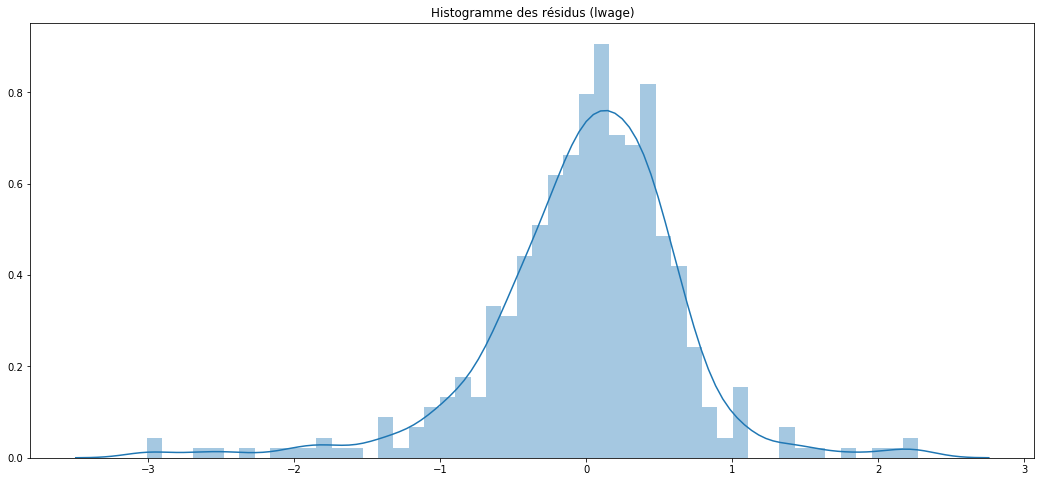

Score Skew & Kurtosis :  79.5424673464374


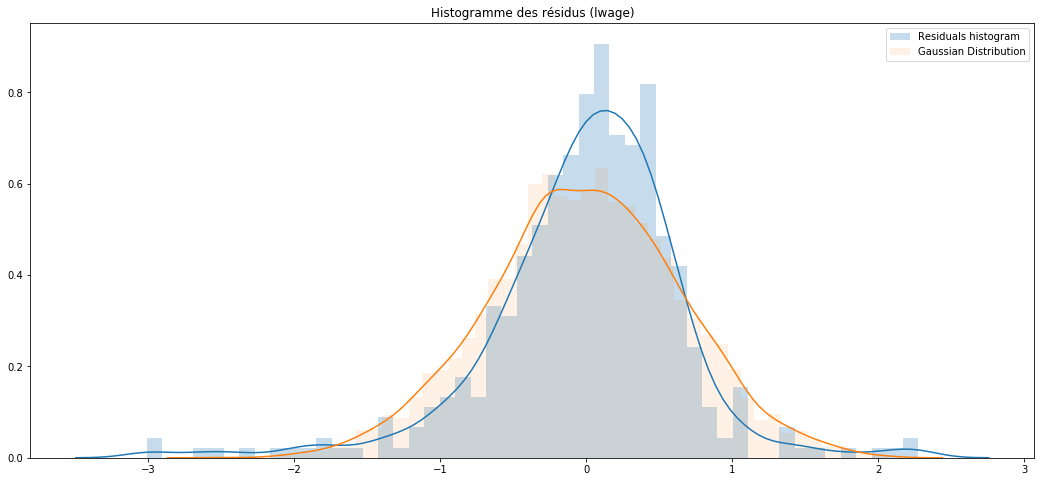

Le passage en log corrige l'heteroscedasticité remarquée à la question 7. La distribution des résidus est relativement proche de la Gaussienne, malgré une légère sur-concentration en zéro.

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           2.00e-13
Time:                        17:40:11   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

Les variables éducation et expérience apparaissent alors comme significatives.

## Question 9
- <font color="blue">Tester l'hypothèse de non significativité de exper avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). </font>

On continue de travailler avec logwage.

Les hypothèses de notre modèle peuvent s'exprimer comme suit :

$$ H_0 : \beta_{exper} = 0 $$

$$ H_1 : \beta_{exper} != 0 $$

On calcule la stat de test suivante :

$$ t_{exper} = \frac { \hat{\beta}_{exper}} {\hat{\sigma}_{exper}} $$

Puis l'on compare cette statistique de test à une valeur critique $$ {t_{n-k}}^{\alpha \%} $$ . 

Si la stat de test est supérieure à la valeur critique, on rejette $ H_0 $. Autrement, on ne peut pas conclure au rejet de l'hypothèse nulle.

n, k :  428 7
sig2: 0.4479571976072196
t_exper :  3.4517182808127607


- <font color="blue">Commentez les p-values.</font>

Seuil: 10%
p_value de t_exper :  0.0006133650790143275
0.00 < 0.10: On rejette l'hypothèse de non-significativité 

Seuil: 5%
p_value de t_exper :  0.0006133650790143275
0.00 < 0.05: On rejette l'hypothèse de non-significativité 

Seuil: 1%
p_value de t_exper :  0.0006133650790143275
0.00 < 0.01: On rejette l'hypothèse de non-significativité 



La p-value associée à la variable Experience étant particulièrement faible, on rejette l'hypothèse de non-significativité de la variable sur lwage.

## Question 10
- <font color="blue">Tester l’hypothèse que le coefficient associé à educ est égal à 10% avec un seuil de significativité de 5% (test à alternatif des deux côtés)</font>

On teste désormais :

$$ t_{educ} = ( \hat{\beta}_{educ} - 0.1 ) / ( \hat{\sigma}_{educ} ) $$

et l'on compare à nouveau cette statistique de test à la valeur critique. 

T-stat :  0.14882666468792646
Seuil: 5%
p-value : 0.8817616705976787
0.88 > 0.05: On ne rejette pas l'hypothèse de non-significativité 



La p-value vaut 0.88. On ne rejette donc pas l'hypothèse que le coefficient associé à l'éducation est de 10%.

## Question 11
- <font color="blue">Tester l’hypothèse jointe que le rendement de l’éducation est de 10% et que celui de l’expérience professionnelle est de 5%.</font>

Pour réaliser un test d'hypothèses jointes, on estime une statistique de test de Fisher entre le modèle contraint et le modèle non-contrait selon les hypothèses :

$$ H_0 : \beta_{educ} = 0.1, \beta_{exper} = 0.05 $$

On définit SSR comme la Somme des résidus au carré. On estime donc deux modèles, un modèle non-contraint, et un modèle contraint.

$$ F_{educ + exper} = ( SSR_c - SSR_{nc} ) / ( ddl_c - ddl_{nc} ) \times ( ddl_{nc} ) / (SSR_{nc}) $$

On compare ensuite cette statistique de test à la valeur critique.

La p_value est de : 9.53570555850547e-11%


La p-value est inférieure au seuil alpha, on va donc rejeter H0.

## Question 12
- <font color="blue">De combien augmente le salaire en pourcentage avec 10 années d’expérience ?</font>

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           2.00e-13
Time:                        17:40:12   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

En 10 ans, le log du salaire augmente en moyenne de  15.49 %


On peut alors déterminer un intervalle de confiance autour de cette valeur :

L'intervalle de confiance est : [ 6.6682% ; 24.3076%]


## Question 13
- <font color="blue">Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6.  Interprétez.</font>

Afin de contraindre le modèle, nous créeons une variable `kid = kidsgt6 + kidslt6`. On ré-écrit l'équation et on estime le coefficient associé à la variable 1 qui comprend l'effet de `kidsgt6 - kidslt6`. Si le coefficient n'est pas significativement différent de 0, on ne rejette pas l'hypothèse nulle d'égalité des deux coefficients.

In [41]:
print(p_val)

0.7102679748432641


On ne rejette pas l'hypothèse d'égalité des coefficients car la p-value est de 0.71 et est supérieure à 5%.

## Question 14
- <font color="blue">En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. </font>


On réalise un F-test dans lequel on inclut uniquement la constante dans le modèle contraint. Ainsi, on teste le fait qu'il n'y ait pas de différence entre le modèle contraint et non-contraint. H0 corresond donc à une hypothèse d'homoscedasticité. 

In [43]:
print(p_val)

0.09130097553302419


On obtient une p-value de 9%, qui implique un rejet de l'hypothèse à 10% mais une non-rejet à 5%.

- <font color="blue">Corriger le problème par rapport à la variable la plus importante en utilisant la méthode des MCG. </font>

On applique la même méthode avec un estimateur des Moindres Carrés Généralisés cette fois-ci, en calculant le log des résidus, afin d'en déduire des poids pour le modèle Feasible Weighted Least Squares.

In [47]:
print(p_val)

0.6271456383048878


La p-value est désormais de 63%, ce qui implique que l'on ne peut pas rejeter l'hypothèse d'homoscedasticité des résidus. On a bien corrigé le problème d'hétéroscedasticité.

- <font color="blue">Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.</font> 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5795
Date:                Fri, 26 Apr 2019   Prob (F-statistic):              0.747
Time:                        17:40:12   Log-Likelihood:                -2120.8
No. Observations:                 428   AIC:                             4256.
Df Residuals:                     421   BIC:                             4284.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1731     16.795      0.784      0.4

Les écarts-types sont beaucoup plus élevés avec avec ce modèle.

## Question 15
- <font color="blue">Tester le changement de structure de la question 8 entre les femmes qui ont moins de 30 ans, entre 30 et 43 ans, plus de 43 ans (3 groupes mutuellement exclusifs). Donnez les p-valeurs. </font>

Nous avons imaginé deux approches pour cette question :
- Une analyse de variance (One-way ANOVA)
- Un test de Chow entre les différents groupes

Commençons par l'ANOVA :

F_onewayResult(statistic=0.21829228903413253, pvalue=0.8039805155171003)

La p-value étant de 0.8039, on ne peut pas conclure à un effet significatif de l'âge.

On peut également tester nos conclusions à cette question en réalisant un test de Chow entre :
- le groupe <30 et le reste
- le groupe <43 et le reste
- le groupe entre 30 et 43 et le reste

On construit la statistique de test sous le test de Chow de la manière suivante :
        
$$ F_{chow} = ( SSR - (SSR_{gr1} + SSR_{gr2}) ) / ( ddl - (ddl_{gr1} + ddl_{gr2}) ) \times ( ddl_{gr1} + ddl_{gr2} ) / ( (SSR_{gr1} + SSR_{gr2} ) $$

#### Groupe <30 vs. reste

In [50]:
print(p_val)

0.7946563995696743


#### Groupe <43 vs. reste

In [51]:
print(p_val)

0.30997341357260577


#### Groupe 30-43 vs. reste

In [52]:
print(p_val)

0.6109025332616165


Toutes les p-values sont supérieures au seuil alpha de 5%. Ainsi, on ne peut pas rejeter l'hypothèse H0 qu'il n'y a aucun changement de régime. Cela conforte les résultats de notre ANOVA.

## Question 16
- <font color="blue">A partir de la variable kidslt6, créer un ensemble de variables binaires pour le nombre d’enfants de moins de 6 ans. </font>

On crée les variables suivantes :
- `kidslt6_1` pour les femmes ayant 1 enfant de moins de 6 ans
- `kidslt6_2` pour les femmes ayant 2 enfants de moins de 6 ans

On supprime la variable `kidslt_6`.

- <font color="blue">Refaire la question 8 avec ces variables et en utilisant comme référence les femmes qui ont des enfants de plus de 6 ans. (Faire la régression de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6.)</font>

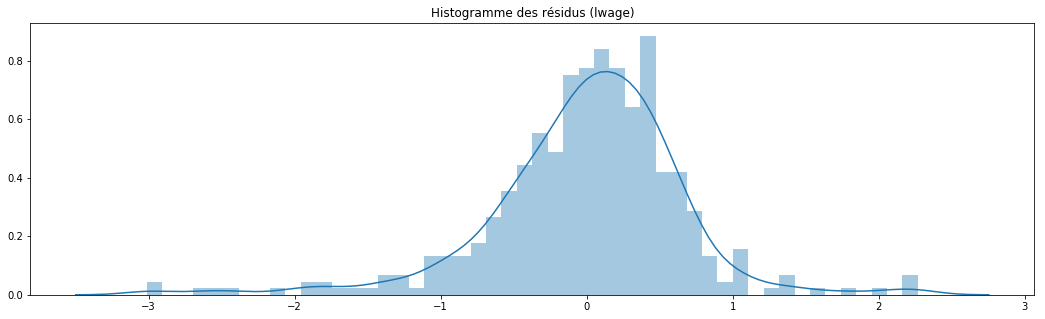

- <font color="blue">Ces catégories sont-elles mutuellement exclusives ?</font> 

Telles que les variables sont construites, il n'est pas possible d'avoir 1 enfant de moins de 6 ans, et également 2 enfant de moins de 6 ans par exemple. Pour cette raison, les catégories sont mutuellement exclusives. On supprime par ailleurs la variable correspondant à 0 enfants, car si une femme n'a ni 1 enfant, ni 2 (dans ce set de données), alors elle n'a pas d'enfant de moins de 6 ans. Par ailleurs, on crée une variable gt6 qui vaut 1 lorsque la femme n'a pas d'enfant de plus de 6 ans, par rapport au cas de base où elle a un enfant de plus de 6 ans.

- <font color="blue">Interprétez les paramètres associés aux variables binaires.</font>

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     11.03
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           8.15e-13
Time:                        17:40:13   Log-Likelihood:                -432.00
No. Observations:                 428   AIC:                             880.0
Df Residuals:                     420   BIC:                             912.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4314      0.192     -2.245      0.0

Le coefficient associé à la variable binaire indique un que si la condition pour satisfaire la variable est respectée, on observe un changement de y égal au coefficient par rapport au cas par défaut pré-défini.

- <font color="blue">Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs.</font>

Aucune des variables ne semble être significative, car les p-valeurs sont toutes élevées, et on ne peut pas rejeter l'hypothèse nulle de non-significativité. Les coefficients, bien que non-significatifs, semblent indiquer que le fait de n'avoir aucun enfant est un plus pour le salaire.

In [58]:
print(p_val)

0.14344360131309886


La p-value de 14.3 % indique que l'on ne peut pas rejeter l'hypothèse nulle de non-significativité de l'ensemble des variables binaires.

## Question 17
A partir de l’échantillon global, faire une régression de inlf sur une constante, city, educ, age,
kidslt6, kidsgt6. 

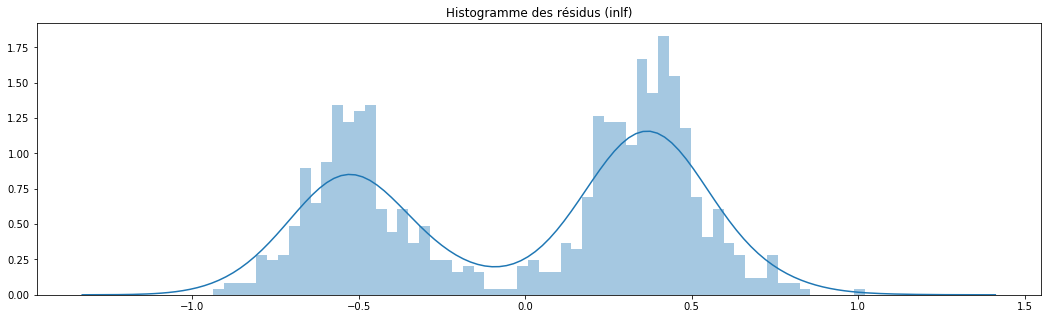

                            OLS Regression Results                            
Dep. Variable:                   inlf   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     21.20
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           7.29e-20
Time:                        17:40:13   Log-Likelihood:                -489.44
No. Observations:                 753   AIC:                             990.9
Df Residuals:                     747   BIC:                             1019.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7076      0.162      4.365      0.0

- <font color="blue">Interprétez les coefficients estimés.</font>

Les coefficients estimés indiquent l'impact, estimé en pourcents, de l'augmentation d'une des variables explicatives sur la probabilité d'observation d'un 1 ou d'un 0 sur la variables `inlf`. Cette interprétation est statistiquement fausse, mais permet une bonne explicabilité du résultat dans les cadres de classification binaire.

D'après ce modèle, l'éducation, l'âge et le nombre d'enfants de moins de 6 ans sont des variables significatives.

## Question 18
- <font color="blue">Estimer le modèle probit de inlf sur une constante, city, educ, age, kidslt6, kidsgt6. </font>

Optimization terminated successfully.
         Current function value: 0.617205
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                  753
Model:                         Probit   Df Residuals:                      747
Method:                           MLE   Df Model:                            5
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.09734
Time:                        17:40:13   Log-Likelihood:                -464.76
converged:                       True   LL-Null:                       -514.87
                                        LLR p-value:                 4.714e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6050      0.467      1.297      0.195      -0.309       1.520
city          -0.0863      0.

- <font color='blue'>Faire le test de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6. </font>

Etant donné qu'il est demandé de réaliser le test par approche de vraisemblance à la question 20, nous en concluons qu'il est demandé ici d'appliquer un F-Test, bien qu'il ne soit pas adapté au modèle probit.

In [63]:
print(p_val)

Optimization terminated successfully.
         Current function value: 0.617205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663577
         Iterations 4
3.3306690738754696e-16


La p-value est quasiment à 0, ce qui implique que l'on peut rejeter l'hypothèse de non-significativité jointe des coefficients associés à kidsle6 et kidsgt6 à 5%.

- <font color='blue'>Comparez le résultat du test à celui de la question 13 </font>

A la question 13, on ne rejettait pas l'hypothèse d'égalité des deux coefficients. Ici, on rejette l'hypothèse de non-significativité jointe des coefficients.

## Question 19
- <font color='blue'>Calculer les effets partiels pour l'ensemble des variables explicatives : dp(y=1)/dxk (k = 1, ..., K), où K est le nombre de variables explicatives. </font>

$$ \delta p(x) / \delta x_j = g(\beta_0 + X \beta) \beta_j $$

$$ g(z) = \delta G / \delta z (z) $$

Optimization terminated successfully.
         Current function value: 0.617205
         Iterations 5
       Probit Marginal Effects       
Dep. Variable:                   inlf
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0304      0.036     -0.843      0.399      -0.101       0.040
x2             0.0435      0.007      5.811      0.000       0.029       0.058
x3            -0.0132      0.003     -5.264      0.000      -0.018      -0.008
x4            -0.3116      0.035     -9.006      0.000      -0.379      -0.244
x5            -0.0191      0.014     -1.355      0.175      -0.047       0.009


- <font color='blue'>Comparer vos résultats à ceux obtenus à la question 17. Commentez.</font>

On remarque que globalement, les effets ont le même ordre de grandeur. Cela signifie notamment que l'absence de transformation ne pénalise pas trop la qualité du modèle. Cela conduit à la significativité des mêmes paramètres. Cependant, l'interprétation dans les modèles Probit ou Logit n'est plus aussi directe.

## Question 20
- <font color='blue'>Faire le test de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6 en utilisant la méthode du rapport de vraisemblance. </font>

In [68]:
print(LR, p)

69.8366275999017 6.841778332359197e-16


Le rapport de vraisemblance vaut 69, et la p-value est très proche de 0.

- <font color='blue'>Comparez aux résultats de la question 18. </font>

La p-value est inférieure à 5%, on peut donc rejeter l'hypothèse nulle de non-significativité jointe. On remarque que la conclusion est différente de la question 18, car les tests de Fisher ne sont notamment pas adaptés aux modèles probit ou logit.

# Partie II - Séries Temporelles

## Question 1
- <font color="blue">Importer les données du fichier quarterly.xls</font>

In [69]:
df.head()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960-01-01,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960-04-01,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960-07-01,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960-10-01,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961-01-01,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073


## Question 2
- <font color="blue">Calculer inf, le taux d’inflation à partir de la variable CPI. </font>

Le taux d'inflation est donné par : 

$ df_{inf} = ( df_{CPI_t} - df_{CPI_{t-1}} ) / ( df_{CPI_t} )  $

- <font color="blue">Faire un graphique dans le temps de inf. </font>

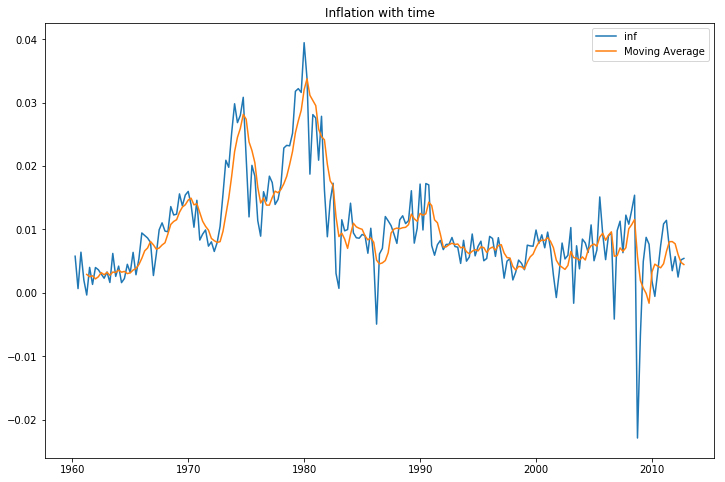

- <font color="blue">Commentez.</font>

L'inflation était élevée jusqu'en 1981, puis a chuté peu avant les années 1990. On remarque une déflation sur la période de crise financière de 2008. Le régime d'inflation semblait plus instable avant les années 90, puis contrôlé entre 1990 et 2008, avant la crise financière.

## Question 3
- <font color="blue">Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de inf. </font>

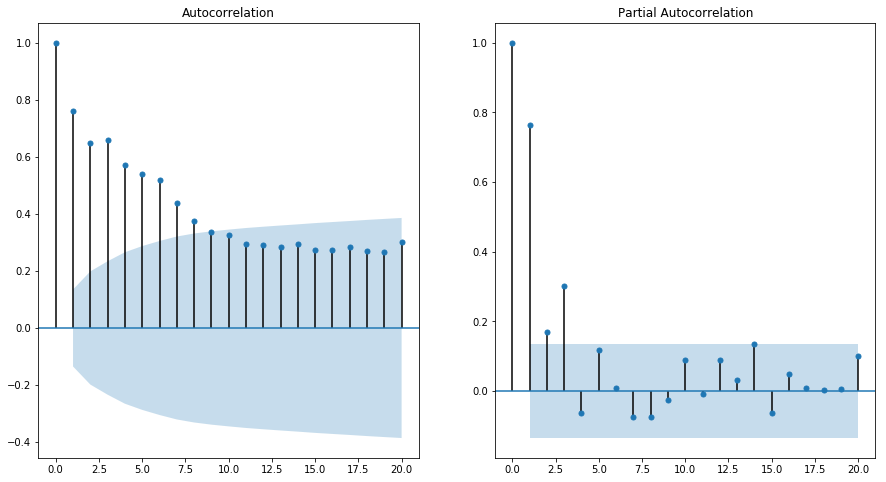

- L'autocorrélogramme indique que l'autocorrelation diminue avec le temps comme dans un processus ARMA(p,q)
- L'autocorrélogramme partiel oscille autour de 0 comme dans un processus de type Moving Average MA(1)

Cela signifie notamment qu'il existe une influence non-négligeable du passé pour la détermination des valeurs présentes. On peut supposer que la série n'est pas stationnaire.

- <font color="blue">Quelle est la différence entre ces deux graphiques ?</font>

L'autocorrélogramme donne l'influence d'une série à un temps t-k dans le passé sur la valeur de la série au temps t, indépendemment du reste des observations. L'autocorrélocgramme partiel réalise la régression de toutes du la valeur présente sur toutes les valeurs passées jusqu'au temps t-k. Ainsi, on identifie les effets joints des différents années.

## Question 4
- <font color="blue">Quelle est la différence entre la stationnarité et l'ergodicité ? Pourquoi a-t-on besoin de ces deux conditions?</font>

- La stationarité est un état atteint lorsque  ys, ys+1, ys+2 ... ne dépend pas de s. En d'autres termes, le futur et le présent sont relativement similaires. 
- L'ergodicité est le processus par lequel l'on oublie les conditions initiales, et l'autocorrélation d''ordre k tend vers 0 quand k tend vers l'infini.
- Ces deux conditions sont nécessaires afin de pouvoir appliquer le théorème d'ergodicité qui garantit que la moyenne des valeurs des observations tend vers l'espérance de la série. Autrement dit, on s'assure que la série ne diverge pas de son espérance.

- <font color="blue">Expliquez le terme "spurious regression".</font>

- Le terme "spurious regression" se refère au fait que deux variables soient corrélées mais qu'aucun lien de causalité ne puis pour autant être établi entre les variables.

## Question 5
- <font color="blue">Proposer une modélisation AR(p) de inf, en utilisant tous les outils vus au cours.</font>

                              ARMA Model Results                              
Dep. Variable:                    inf   No. Observations:                  211
Model:                     ARMA(5, 0)   Log Likelihood                 832.908
Method:                       css-mle   S.D. of innovations              0.005
Date:                Fri, 26 Apr 2019   AIC                          -1651.816
Time:                        17:40:16   BIC                          -1628.353
Sample:                             0   HQIC                         -1642.331
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093      0.002      4.018      0.000       0.005       0.014
ar.L1.inf      0.6044      0.068      8.857      0.000       0.471       0.738
ar.L2.inf     -0.0588      0.080     -0.737      0.4

Afin d'identifier le paramètre p optimal, on cherche à minimiser le critère Akaike Information Criterion (AIC).

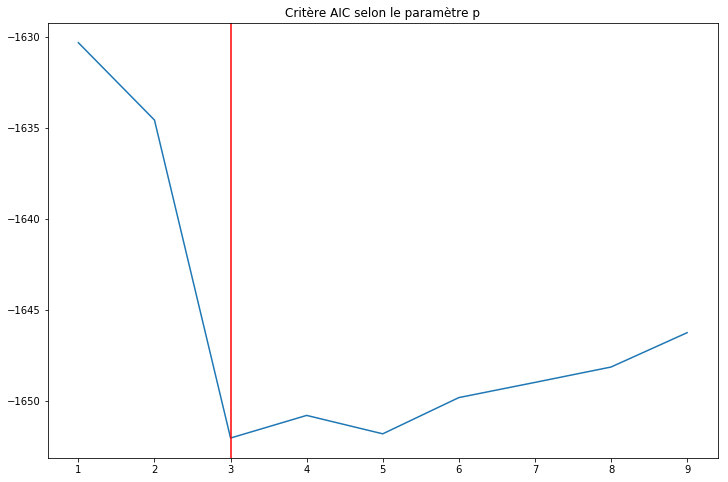

Le critère AIC est minimisé pour une valeur de p valant 3. On peut s'intéresser à la performance en prédiction d'un tel modèle.

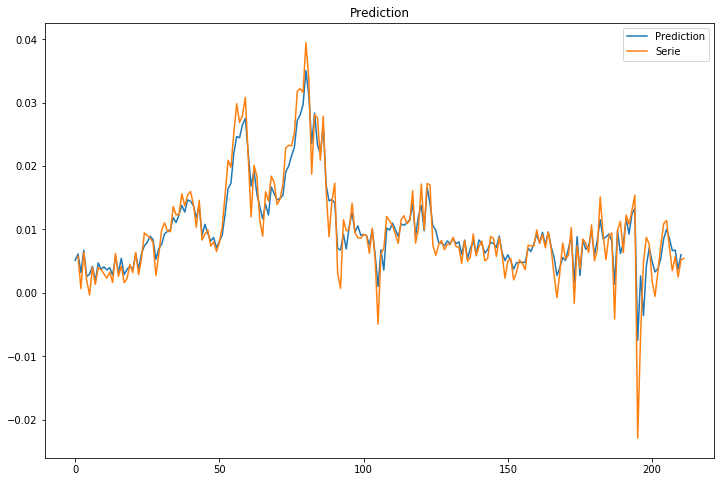

Lag: 3
Coefficients: [ 0.00962934  0.57949951 -0.01686016  0.29775042]


## Question 6
- <font color="blue">Estimer le modèle de la courbe de Philips qui explique le taux de chômage (Unemp) en fonction du taux d’inflation courant et une constante.</font>

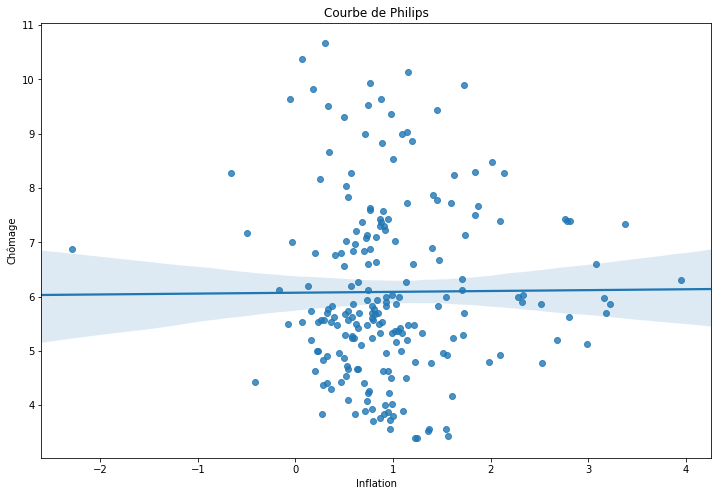

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01214
Date:                Fri, 26 Apr 2019   Prob (F-statistic):              0.912
Time:                        17:41:07   Log-Likelihood:                -400.28
No. Observations:                 211   AIC:                             804.6
Df Residuals:                     209   BIC:                             811.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0708      0.181     33.576      0.0

Le coefficient semble indiquer qu'une augmentation de 1% de l'inflation augmente le chômage de 0.016%. Il ne semble pas que la variable CPI soit significative à 5% étant donné que la p-value est supérieure à ce seuil.

## Question 7
- <font color="blue">Tester l’autocorrélation des erreurs.</font>

On peut commencer par représenter graphiquement la valeur des résidus :

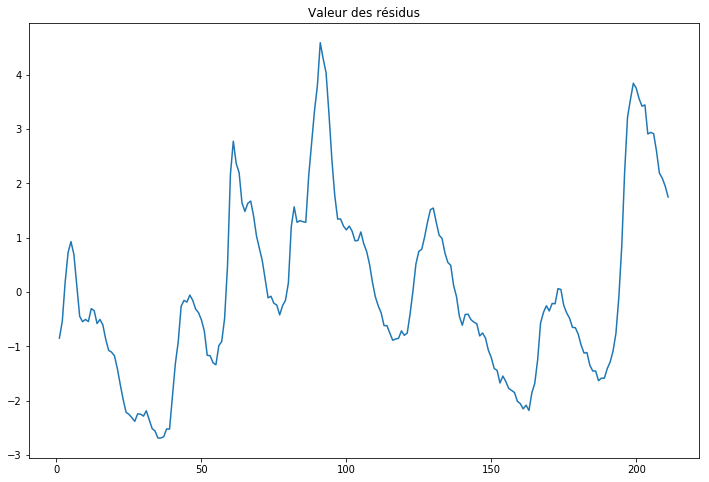

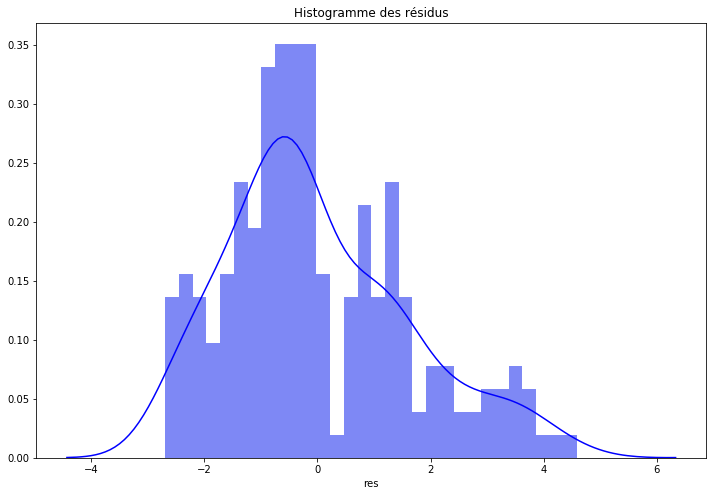

Pour tester l'autocorrélation des erreurs, on peut appliquer le test de Durbin Watson sur les résidus. Les résidus, après régression, devraient avoir une moyenne de 0 et pas de corrélation. Ainsi, si le test d'autocorrélation de Durbin Watson vaut environ 2, il n'y a pas d'autocorrélation, s'il vaut proche de 0, il y a une autocorrélation positive, et s'il vaut environ 4, l'autocorrélation est négative.

In [86]:
# Durbin Watson test
durbin_watson(df.res)

0.044194128074712014

Ici, la valeur du test de DW est proche de 0. On en conclut que l'autocorrélation doit être positive. Si l'on regarde l'autocorrélogramme, on confirme ce constat.

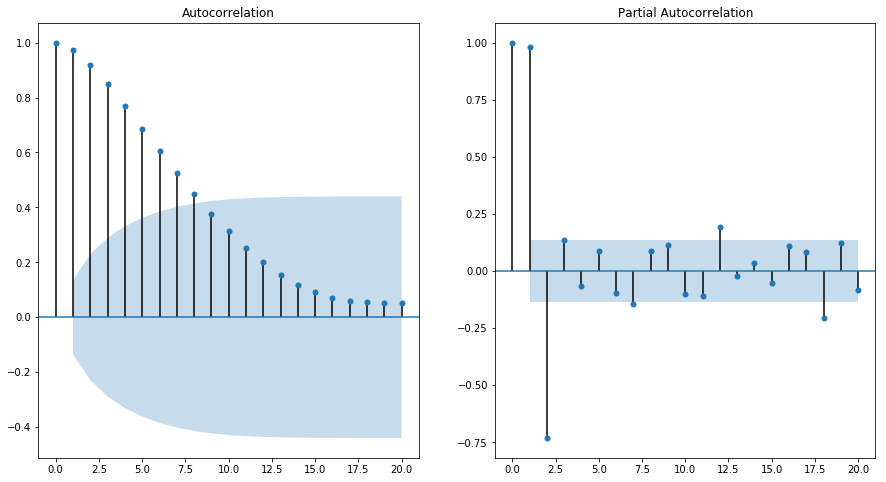

## Question 8
- <font color="blue">Corriger l’autocorrélation des erreurs par la méthode vue en cours.</font>

Afin de corriger l'autocorrélation, on peut estimer un nouveau modèle égal à :

$$ y_t - \rho y_{t-1} = \tilde{y}_t = (1-\rho) \beta_0 + \beta_1 \tilde{X}_t + \epsilon_t $$

In [88]:
# Estimation de rho
print(rho)

0.979923779970792


On estime maintenant avec le nouveau modèle laggé la statistique de Durbin Watson :

In [92]:
durbin_watson(df['res_c'])

0.718292189000225

Le test de Durbin Watson est plus proche de 2. On a donc corrigé une partie de l'autocorrélation.

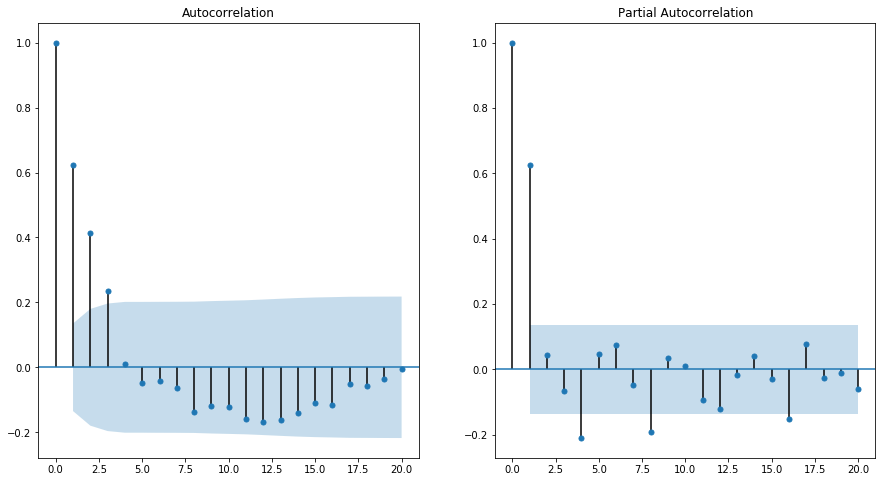

Nous pouvons donc utiliser ces valeurs corrigées pour la suite. (Nous ne savons pas si c'est ce qui était attendu, mais cela nous paraissait logique).

## Question 9
- <font color="blue">Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique.</font>

On peut commencer par regarder les paramètres lorsque l'on coupe notre période en 2 :

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7071
Date:                Fri, 26 Apr 2019   Prob (F-statistic):              0.402
Time:                        17:41:26   Log-Likelihood:                -204.20
No. Observations:                 105   AIC:                             412.4
Df Residuals:                     103   BIC:                             417.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9377      0.287     20.662      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.315
Date:                Fri, 26 Apr 2019   Prob (F-statistic):             0.0715
Time:                        17:41:26   Log-Likelihood:                -193.35
No. Observations:                 106   AIC:                             390.7
Df Residuals:                     104   BIC:                             396.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4269      0.259     24.822      0.0

On peut maintenant réaliser un test de changement de structure (test de Chow).

In [99]:
print(F, p_val)

4.147753695614069 0.017132140479924507


La p-value est inférieure au seuil de 5%. On rejette donc l'hypothèse de stabilité entre les deux périodes pour la séparation que nous avons sélectionné.

## Question 10
- <font color="blue">Faites les tests changement de structure de Chow.</font>

On commence par representer graphiquement les séries d'inflation et de chômage laggées.

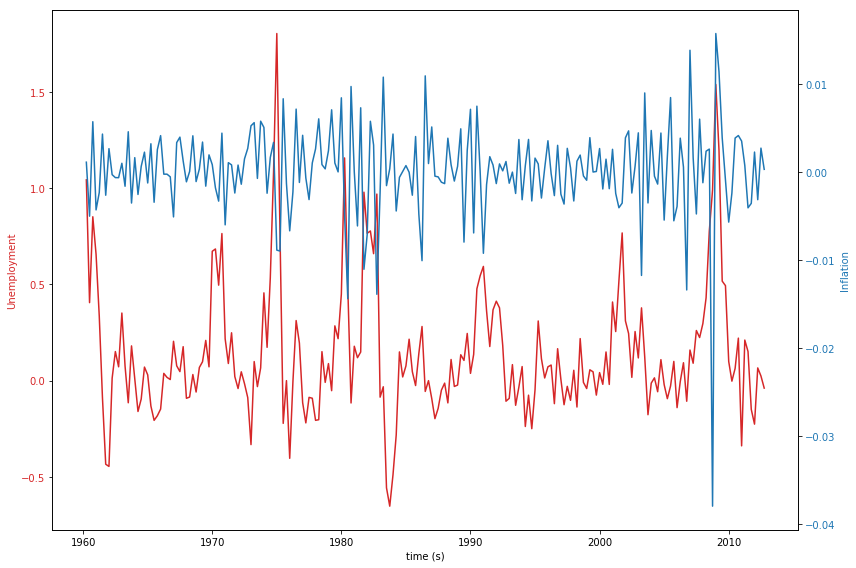

- <font color="blue">Détecter le point de rupture.</font>

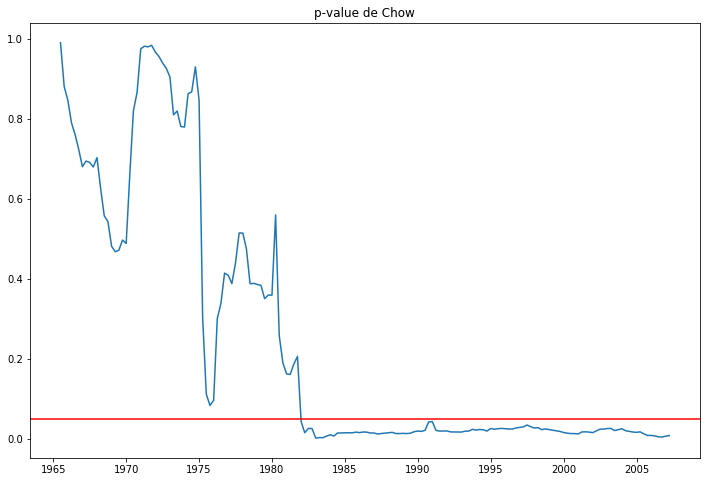

In [104]:
# Période de rupture
df.DATE[int(0.1*len(df)) + np.argmin(p_val)]

Timestamp('1982-10-01 00:00:00')

L'hypothèse nulle du test de Chow indique que l'on suppose qu'il n'y a pas de changement de structure. Ainsi, lorsque la p-value est inférieure à 5%, on doit faire l'hypothèse que la structure change dans le temps. Avant l'année 82, il n'y avait pas/peu de stabilité dans le régime d'inflation. 

La crise pétrolière des années 70 a failli provoquer un changement de structure. En 1982, un point de rupture a été atteint.

## Question 11
- <font color="blue">Estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage. </font>

In [107]:
# Variables 0-3 : Unemp.
# Variables 4-7 : infl.

                            OLS Regression Results                            
Dep. Variable:                      8   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     21.21
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           4.55e-23
Time:                        17:41:32   Log-Likelihood:                -2.0160
No. Observations:                 206   AIC:                             22.03
Df Residuals:                     197   BIC:                             51.98
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0469      0.020      2.308      0.0

Les variables significatives dans ce nouveau modèle sont :
- le chômage au temps t-1
- le chômage au temps t-4

- <font color="blue"> Faire le test de Granger de non causalité de l’inflation sur le chômage. Donnez la p-valeur. </font>

L'hypothèse nulle pour les tests de causalité de Granger est que la série temporelle dans la deuxième colonne, x2, ne cause PAS la série temporelle dans la première colonne, x1. 

La causalité de Granger signifie que les valeurs passées de x2 ont un effet statistiquement significatif sur la valeur actuelle de x1, en tenant compte des valeurs passées de x1 comme variables explicatives. 

Nous rejetons l'hypothèse nulle que x2 ne cause pas x1 au sens de Granger si les valeurs p sont inférieures au seuil désiré.

In [108]:
granger(df[['Unemp_lag', 'inf_lag']], 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3433  , p=0.5586  , df_denom=207, df_num=1
ssr based chi2 test:   chi2=0.3482  , p=0.5551  , df=1
likelihood ratio test: chi2=0.3480  , p=0.5553  , df=1
parameter F test:         F=0.3433  , p=0.5586  , df_denom=207, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5393  , p=0.5840  , df_denom=204, df_num=2
ssr based chi2 test:   chi2=1.1051  , p=0.5755  , df=2
likelihood ratio test: chi2=1.1022  , p=0.5763  , df=2
parameter F test:         F=0.5393  , p=0.5840  , df_denom=204, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8206  , p=0.4839  , df_denom=201, df_num=3
ssr based chi2 test:   chi2=2.5475  , p=0.4668  , df=3
likelihood ratio test: chi2=2.5320  , p=0.4695  , df=3
parameter F test:         F=0.8206  , p=0.4839  , df_denom=201, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8129  , p=0.5183  

{1: ({'lrtest': (0.3479507614470094, 0.5552754528335102, 1),
   'params_ftest': (0.34326433653111804, 0.5585892708239268, 207.0, 1.0),
   'ssr_chi2test': (0.3482391819880981, 0.5551115828057411, 1),
   'ssr_ftest': (0.34326433653112526, 0.5585892708239268, 207.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (1.1022042952622542, 0.576314276803943, 2),
   'params_ftest': (0.539338792500007, 0.5839628648705697, 204.0, 2.0),
   'ssr_chi2test': (1.1051157611029379, 0.5754759274931314, 2),
   'ssr_ftest': (0.5393387924999984, 0.5839628648705697, 204.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (2.5320350129870803, 0.46952944812668085, 3),
   'params_ftest': (0.8205919320314315, 0.48386507661399847, 201.0, 3.0),
   'ssr_chi2test': (2.547509281530395, 0.46676624303068226, 3),
   'ssr_ftest': (0.8205919320314254, 0.48386507661399847, 201.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0

L'intégralité des p-values sont supérieures au seuil de 5%. Nous rejetons donc pas l'hypothèse nulle que l'inflation ne cause pas de chômage.

## Question 12
- <font color="blue">Représentez graphiquement les délais distribués et commentez. </font>

Un délai distribué peut-être exprimé comme :
$$ y_t = \alpha_0 + \delta_0 z_t + \delta_1 z_{t-1} + \delta_2 z_{t-2} + \delta_3 z_{t-3} + \delta_4 z_{t-4} + u_t $$

                            OLS Regression Results                            
Dep. Variable:                      8   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     33.41
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           1.02e-24
Time:                        17:41:32   Log-Likelihood:                -3.4753
No. Observations:                 206   AIC:                             18.95
Df Residuals:                     200   BIC:                             38.92
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0539      0.020      2.749      0.0

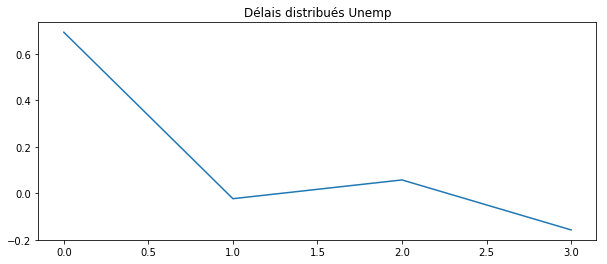

- <font color="blue">Calculer l’impact à long de terme de l’inflation sur le chômage.</font>

L'effet de long terme est donné par :
$$ \delta_0 + \delta_1 + \delta_2 + \delta_3 + ... $$

In [111]:
model.params[1:].sum()

2.8137925103027586